<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/%EC%8B%A4%EC%8A%B57_MNIST_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 7. MNIST 필기체 숫자 분류 연습

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py39" --user

In [69]:
!python --version

Python 3.9.1


In [77]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

* 학습데이터 5000개, 테스트 데이터 2000개




In [79]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [80]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [81]:
print("mnist.DESCR=",mnist.DESCR)

mnist.DESCR= **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 

In [82]:
print("mnist.feature_names=",mnist.feature_names)

mnist.feature_names= ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90

In [83]:
X, y = mnist['data'], mnist["target"]
print(X.shape)

import numpy as np
# y 속성을 숫자형으로 변환
y = y.astype(np.uint8)

(70000, 784)


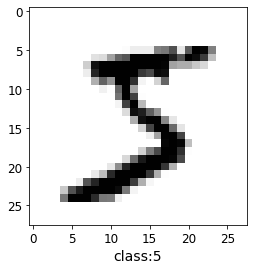

In [84]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.xlabel("class:" + str(y[0])) # 목표값 확인
plt.show()

In [ ]:
y[0]

5

In [85]:
train_size = 5000 #학습 데이터
test_size = 2000 #테스트 데이터
test_index = 60000 + test_size
X_train, X_test, y_train, y_test = X[:train_size], X[60000:test_index], y[:train_size], y[60000:test_index]
print("X_train=", X_train.shape)
print("X_test=", X_test.shape)

X_train= (5000, 784)
X_test= (2000, 784)


* 2-class (숫자 0인지 아닌지) 분류문제

In [86]:
y_train_0 = (y_train == 0) # 0는 True, 다른 숫자는 모두 False
y_test_0 = (y_test == 0)
print(y_train[0], y_train_0[0])
print(y_test[0], y_test_0[0])

5 False
7 False


* 3-NN, Logistic Regression 알고리즘 사용



> 3-NN



In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier(n_neighbors=3)
print("knn training ... ")
knn.fit(X_train, y_train_0)

knn training ... 


KNeighborsClassifier(n_neighbors=3)

In [91]:
print("knn testing ... ")
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_0, y_pred)
print("accuracy_score (MNIST 2-class, 3-NN) = {:.2f}".format(acc))

knn testing ... 
accuracy_score (MNIST 2-class, 3-NN) = 0.99




> Logistic Regression



In [93]:
from sklearn.linear_model import LogisticRegression
print("LogisticRegression training ... ")
logreg = LogisticRegression().fit(X_train, y_train_0)

# test data 성능 확인
print("LogisticRegression testing ... ")
y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test_0, y_pred)
print("accuracy_score (MNIST 2-class, LogisticRegression) = {:.2f}".format(acc))

LogisticRegression training ... 
LogisticRegression testing ... 
accuracy_score (MNIST 2-class, LogisticRegression) = 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [94]:
#예측 결과 확인
print("y_test[:6] = ",y_test[:6]) #숫자 확인
print("y_test_0[:6] = ",y_test_0[:6])
print("y_pred[:6] = ",y_pred[:6]) #예측 결과

y_test[:6] =  [7 2 1 0 4 1]
y_test_0[:6] =  [False False False  True False False]
y_pred[:6] =  [False False False  True False False]
